Download and extract data

In [1]:
import urllib.request
import tarfile
import os

if os.path.isdir('MovieSummaries') == False:
    print("Downloading and extracting data...")
    data_tar_link = "http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz"
    ftpstream = urllib.request.urlopen(data_tar_link)

    data_tar_file = tarfile.open(fileobj=ftpstream, mode="r|gz")
    data_tar_file.extractall()
    
    print("Dataset downloaded and extracted.")
else:
    print("Dataset already downloaded")

print("Data size: ", sum(os.path.getsize(os.path.join('MovieSummaries', f)) / (1024.0*1024.0)
          for f in os.listdir('MovieSummaries')
          if os.path.isfile(os.path.join('MovieSummaries', f))), "MB")
# this should take less than two minutes (depends mostly on connection speed), if it takes longer 
# check if MovieSummaries directory is created in working directory and some files are in it

Dataset already downloaded
Data size:  127.5914134979248 MB


In [2]:
movie_summaries = []

with open('MovieSummaries/plot_summaries.txt') as movie_summaries_file:
    for line in movie_summaries_file.readlines():
        splitted_line = line.split('\t', 1)
        movie_summaries.append((int(splitted_line[0]), splitted_line[1]))
        
print(len(movie_summaries))

42306


Ima manje opisa filmova nego filmova u movie.metadata.tsv ?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_pickle('movie_metadata2.pkl')

In [4]:
data.head()

,wikiID,name,standard_genre
0,975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science ..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{Drama, Biography, Mystery}"
2,28463795,Brun bitter,"{Crime, Drama, Fiction}"
3,9363483,White Of The Eye,"{Thriller, Psychological}"
4,261236,A Woman in Flames,{Drama}


In [5]:
data['summary'] = ""

In [6]:
data = data.set_index('wikiID')
data.head()

,name,standard_genre,summary
wikiID,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science ...",
3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{Drama, Biography, Mystery}",
28463795,Brun bitter,"{Crime, Drama, Fiction}",
9363483,White Of The Eye,"{Thriller, Psychological}",
261236,A Woman in Flames,{Drama},


In [7]:
cnt = 0

for movie_id, summary in movie_summaries:
    if movie_id not in data.index:
         continue
    
    cnt += 1
    data.at[movie_id, 'summary'] = summary
    
print(cnt)

39645


In [8]:
print(len(data[data['summary'] == ""]))
data[data['summary'] == ""].head()

33480


,name,standard_genre,summary
wikiID,,,
3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{Drama, Biography, Mystery}",
28463795,Brun bitter,"{Crime, Drama, Fiction}",
13696889,The Gangsters,{Comedy},
10408933,Alexander's Ragtime Band,"{Musical, Comedy}",
9997961,Contigo y aquí,"{Musical, Comedy, Drama}",


U README.txt pise da ukupno ima 42 306 sazetaka plotova u ovom datasetu, dakle odbacili smo oko 2000 filmova.

In [9]:
data = data[data['summary'] != ""]
print(len(data))

39645


In [10]:
data.head()

,name,standard_genre,summary
wikiID,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science ...","Set in the second half of the 22nd century, th..."
9363483,White Of The Eye,"{Thriller, Psychological}",A series of murders of rich young women throug...
261236,A Woman in Flames,{Drama},"Eva, an upper class housewife, becomes frustra..."
18998739,The Sorcerer's Apprentice,"{Family, Fantasy, Adventure}","Every hundred years, the evil Morgana returns..."
6631279,Little city,"{Romance Film, Comedy, Drama, Romance}","Adam, a San Francisco-based artist who works a..."


In [11]:
for summary in data['summary'][:1]:
    print(summary)

Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho  sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released "ghosts," disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock  murdered, Ballard must fight off the attacking miners, escape th

## Expanding contractions

In [12]:
import contractions # instalirao preko pip, ne preko conda
from unidecode import unidecode # ima Ibrahim sa tockom na I

def contract(text):
    ret = []
    for word in text.split():
        try:
            ret.append(contractions.fix(word))
        except:
            print(word)
            print(unidecode(word))
            ret.append(contractions.fix(unidecode(word)))
    return ret

data['no_contract'] = data['summary'].apply(contract)

data.head()

İbrahim
Ibrahim
İbrahim
Ibrahim
İbrahim
Ibrahim


,name,standard_genre,summary,no_contract
wikiID,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science ...","Set in the second half of the 22nd century, th...","[Set, in, the, second, half, of, the, 22nd, ce..."
9363483,White Of The Eye,"{Thriller, Psychological}",A series of murders of rich young women throug...,"[A, series, of, murders, of, rich, young, wome..."
261236,A Woman in Flames,{Drama},"Eva, an upper class housewife, becomes frustra...","[Eva,, an, upper, class, housewife,, becomes, ..."
18998739,The Sorcerer's Apprentice,"{Family, Fantasy, Adventure}","Every hundred years, the evil Morgana returns...","[Every, hundred, years,, the, evil, Morgana, r..."
6631279,Little city,"{Romance Film, Comedy, Drama, Romance}","Adam, a San Francisco-based artist who works a...","[Adam,, a, San, Francisco-based, artist, who, ..."


In [13]:
pd.set_option('display.max_colwidth', 1000)
data['summary_str'] = [' '.join(map(str, word)) for word in data['no_contract']]

data = data.drop(columns=['no_contract'])

data.head()

,name,standard_genre,summary,summary_str
wikiID,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escape ..."
9363483,White Of The Eye,"{Thriller, Psychological}","A series of murders of rich young women throughout Arizona bear distinctive signatures of a serial killer. Clues lead Detective Charles Mendoza to visit Paul White, a sound expert installing hi-fi systems in wealthy people's homes. His special talent is to make a noise which echoes through the air cavities in his head and shows him where the sound of the speakers should come from and echo in the room. He is married to Joan, whom, ten years earlier, he had seduced away from Mike DeSantos, her then current boyfriend. Joan is questioned by Mendoza, but does not believe his insinuations that her husband is somehow involved in the murders. Various flashbacks show Joan's previous relationship to Mike and later explain how it came to be that he abandoned her. The couple met Paul and befriended him. At Mike's suggestion, he and Mike go on a deer hunting trip together. Paul shoots a deer and brutally mutilates it, demonstrating his sick fascination with killing. This is partly intended to s...","A series of murders of rich young women throughout Arizona bear distinctive signatures of a serial killer. Clues lead Detective Charles Mendoza to visit Paul White, a sound expert installing hi-fi systems in wealthy people's homes. His special talent is to make a noise which echoes through the air cavities in his head and shows him where the sound of the speakers should come from and echo in the room. He is married to Joan, whom, ten years earlier, he had seduced away from Mike DeSantos, her then current boyfriend. Joan is questioned by Mendoza, but does not believe his insinuations that her husband is somehow involved in the murders. Various flashbacks show Joan's previous relationship to Mike and later explain how it came to be that he abandoned her. The couple met Paul and befriended him. At M

## To lower case

In [14]:
data['summary_str'] = data['summary_str'].str.lower()

data.head()[:1]

,name,standard_genre,summary,summary_str
wikiID,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ..."


## Tokenizacija

In [15]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

data['tokenized'] = data['summary_str'].apply(word_tokenize)

data.head()[:1]

[nltk_data] Downloading package punkt to /home/ltomic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,name,standard_genre,summary,summary_str,tokenized
wikiID,,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ...","[set, in, the, second, half, of, the, 22nd, century, ,, the, film, depicts, mars, as, a, planet, that, has, been, 84, %, terraformed, ,, allowing, humans, to, walk, on, the, surface, without, wearing, pressure, suits, ., the, martian, society, has, become, largely, matriarchal, ,, with, women, in, most, positions, of, authority, ., the, story, concerns, a, police, officer, ,, melanie, ballard, ,, second, in, command, of, a, small, team, alongside, sergeant, jericho, sent, to, pick, up, and, transport, a, prisoner, named, desolation, williams, ., arriving, at, the, remote, mining, town, where, williams, is, being, held, ,, ballard, finds, virtually, all, ...]"


## Micanje interpunkcije

In [16]:
import string

data['bez_interpunkcije'] = data['tokenized'].apply(
    lambda x: [word for word in x if word not in string.punctuation])

data.head()[:1]

,name,standard_genre,summary,summary_str,tokenized,bez_interpunkcije
wikiID,,,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ...","[set, in, the, second, half, of, the, 22nd, century, ,, the, film, depicts, mars, as, a, planet, that, has, been, 84, %, terraformed, ,, allowing, humans, to, walk, on, the, surface, without, wearing, pressure, suits, ., the, martian, society, has, become, largely, matriarchal, ,, with, women, in, most, positions, of, authority, ., the, story, concerns, a, police, officer, ,, melanie, ballard, ,, second, in, command, of, a, small, team, alongside, sergeant, jericho, sent, to, pick, up, and, transport, a, prisoner, named, desolation, williams, ., arriving, at, the, remote, mining, town, where, williams, is, being, held, ,, ballard, finds, virtually, all, ...]","[set, in, the, second, half, of, the, 22nd, century, the, film, depicts, mars, as, a, planet, that, has, been, 84, terraformed, allowing, humans, to, walk, on, the, surface, without, wearing, pressure, suits, the, martian, society, has, become, largely, matriarchal, with, women, in, most, positions, of, authority, the, story, concerns, a, police, officer, melanie, ballard, second, in, command, of, a, small, team, alongside, sergeant, jericho, sent, to, pick, up, and, transport, a, prisoner, named, desolation, williams, arriving, at, the, remote, mining, town, where, williams, is, being, held, ballard, finds, virtually, all, of, the, people, missing, she, learns, that, the, miners, had, ...]"


In [17]:
data['tokenized'] = data['bez_interpunkcije']
data = data.drop(columns=['bez_interpunkcije'])

data.head()[:1]

,name,standard_genre,summary,summary_str,tokenized
wikiID,,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ...","[set, in, the, second, half, of, the, 22nd, century, the, film, depicts, mars, as, a, planet, that, has, been, 84, terraformed, allowing, humans, to, walk, on, the, surface, without, wearing, pressure, suits, the, martian, society, has, become, largely, matriarchal, with, women, in, most, positions, of, authority, the, story, concerns, a, police, officer, melanie, ballard, second, in, command, of, a, small, team, alongside, sergeant, jericho, sent, to, pick, up, and, transport, a, prisoner, named, desolation, williams, arriving, at, the, remote, mining, town, where, williams, is, being, held, ballard, finds, virtually, all, of, the, people, missing, she, learns, that, the, miners, had, ...]"


In [18]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
data['stopwords_removed'] = data['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

data.head()[:1]

,name,standard_genre,summary,summary_str,tokenized,stopwords_removed
wikiID,,,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ...","[set, in, the, second, half, of, the, 22nd, century, the, film, depicts, mars, as, a, planet, that, has, been, 84, terraformed, allowing, humans, to, walk, on, the, surface, without, wearing, pressure, suits, the, martian, society, has, become, largely, matriarchal, with, women, in, most, positions, of, authority, the, story, concerns, a, police, officer, melanie, ballard, second, in, command, of, a, small, team, alongside, sergeant, jericho, sent, to, pick, up, and, transport, a, prisoner, named, desolation, williams, arriving, at, the, remote, mining, town, where, williams, is, being, held, ballard, finds, virtually, all, of, the, people, missing, she, learns, that, the, miners, had, ...]","[set, second, half, 22nd, century, film, depicts, mars, planet, 84, terraformed, allowing, humans, walk, surface, without, wearing, pressure, suits, martian, society, become, largely, matriarchal, women, positions, authority, story, concerns, police, officer, melanie, ballard, second, command, small, team, alongside, sergeant, jericho, sent, pick, transport, prisoner, named, desolation, williams, arriving, remote, mining, town, williams, held, ballard, finds, virtually, people, missing, learns, miners, discovered, underground, doorway, created, ancient, martian, civilization, door, opened, released, ``, ghosts, '', disembodied, spirits, possessed, miners, violence, ensues, possessed, miners, commit, horrific, acts, death, destruction, well, self-mutilation, team, leader, helena, bradock, murdered, ballard, must, fight, attacking, miners, escape, town, ...]"


In [19]:
data['tokenized'] = data['stopwords_removed']
data = data.drop(columns=['stopwords_removed'])

data.head()[:1]

,name,standard_genre,summary,summary_str,tokenized
wikiID,,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ...","[set, second, half, 22nd, century, film, depicts, mars, planet, 84, terraformed, allowing, humans, walk, surface, without, wearing, pressure, suits, martian, society, become, largely, matriarchal, women, positions, authority, story, concerns, police, officer, melanie, ballard, second, command, small, team, alongside, sergeant, jericho, sent, pick, transport, prisoner, named, desolation, williams, arriving, remote, mining, town, williams, held, ballard, finds, virtually, people, missing, learns, miners, discovered, underground, doorway, created, ancient, martian, civilization, door, opened, released, ``, ghosts, '', disembodied, spirits, possessed, miners, violence, ensues, possessed, miners, commit, horrific, acts, death, destruction, well, self-mutilation, team, leader, helena, bradock, murdered, ballard, must, fight, attacking, miners, escape, town, ...]"


TODO: treba maknuti "'s" iz tokenized dijela

Treba maknuti 's `` i "

In [20]:
data['bez_interpunkcije2'] = data['tokenized'].apply(
    lambda x: [word for word in x if word not in {"'s", "``", "''"}])

data.head()[:1]

,name,standard_genre,summary,summary_str,tokenized,bez_interpunkcije2
wikiID,,,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ...","[set, second, half, 22nd, century, film, depicts, mars, planet, 84, terraformed, allowing, humans, walk, surface, without, wearing, pressure, suits, martian, society, become, largely, matriarchal, women, positions, authority, story, concerns, police, officer, melanie, ballard, second, command, small, team, alongside, sergeant, jericho, sent, pick, transport, prisoner, named, desolation, williams, arriving, remote, mining, town, williams, held, ballard, finds, virtually, people, missing, learns, miners, discovered, underground, doorway, created, ancient, martian, civilization, door, opened, released, ``, ghosts, '', disembodied, spirits, possessed, miners, violence, ensues, possessed, miners, commit, horrific, acts, death, destruction, well, self-mutilation, team, leader, helena, bradock, murdered, ballard, must, fight, attacking, miners, escape, town, ...]","[set, second, half, 22nd, century, film, depicts, mars, planet, 84, terraformed, allowing, humans, walk, surface, without, wearing, pressure, suits, martian, society, become, largely, matriarchal, women, positions, authority, story, concerns, police, officer, melanie, ballard, second, command, small, team, alongside, sergeant, jericho, sent, pick, transport, prisoner, named, desolation, williams, arriving, remote, mining, town, williams, held, ballard, finds, virtually, people, missing, learns, miners, discovered, underground, doorway, created, ancient, martian, civilization, door, opened, released, ghosts, disembodied, spirits, possessed, miners, violence, ensues, possessed, miners, commit, horrific, acts, death, destruction, well, self-mutilation, team, leader, helena, bradock, murdered, ballard, must, fight, attacking, miners, escape, town, destroy, ghosts, ...]"


In [21]:
data['tokenized'] = data['bez_interpunkcije2']
data = data.drop(columns=['bez_interpunkcije2'])

data.head()[:1]

,name,standard_genre,summary,summary_str,tokenized
wikiID,,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ...","[set, second, half, 22nd, century, film, depicts, mars, planet, 84, terraformed, allowing, humans, walk, surface, without, wearing, pressure, suits, martian, society, become, largely, matriarchal, women, positions, authority, story, concerns, police, officer, melanie, ballard, second, command, small, team, alongside, sergeant, jericho, sent, pick, transport, prisoner, named, desolation, williams, arriving, remote, mining, town, williams, held, ballard, finds, virtually, people, missing, learns, miners, discovered, underground, doorway, created, ancient, martian, civilization, door, opened, released, ghosts, disembodied, spirits, possessed, miners, violence, ensues, possessed, miners, commit, horrific, acts, death, destruction, well, self-mutilation, team, leader, helena, bradock, murdered, ballard, must, fight, attacking, miners, escape, town, destroy, ghosts, ...]"


In [22]:
data['tokenized_len'] = data['tokenized'].apply(len)

data.head()[:1]

,name,standard_genre,summary,summary_str,tokenized,tokenized_len
wikiID,,,,,,
975900,Ghosts of Mars,"{Thriller, Action, Horror, Adventure, Science Fiction}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock murdered, Ballard must fight off the attacking miners, escap...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town where williams is being held, ballard finds virtually all of the people missing. she learns that the miners had discovered an underground doorway created by an ancient martian civilization. when the door was opened it released ""ghosts,"" disembodied spirits which possessed the miners. violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. with their team leader helena bradock murdered, ballard must fight off the attacking miners, escape ...","[set, second, half, 22nd, century, film, depicts, mars, planet, 84, terraformed, allowing, humans, walk, surface, without, wearing, pressure, suits, martian, society, become, largely, matriarchal, women, positions, authority, story, concerns, police, officer, melanie, ballard, second, command, small, team, alongside, sergeant, jericho, sent, pick, transport, prisoner, named, desolation, williams, arriving, remote, mining, town, williams, held, ballard, finds, virtually, people, missing, learns, miners, discovered, underground, doorway, created, ancient, martian, civilization, door, opened, released, ghosts, disembodied, spirits, possessed, miners, violence, ensues, possessed, miners, commit, horrific, acts, death, destruction, well, self-mutilation, team, leader, helena, bradock, murdered, ballard, must, fight, attacking, miners, escape, town, destroy, ghosts, ...]",201


In [23]:
data['tokenized_len'].describe()

count    39645.000000
mean       172.699256
std        172.120418
min          6.000000
25%         50.000000
50%        106.000000
75%        253.000000
max       2566.000000
Name: tokenized_len, dtype: float64

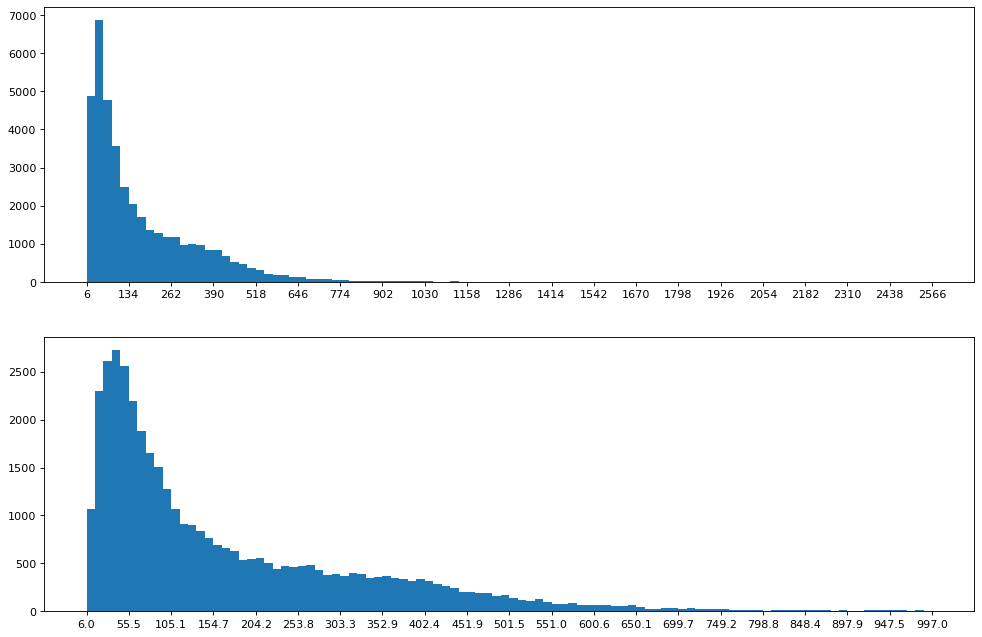

In [24]:
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(211)
n, bins, patches = plt.hist(data['tokenized_len'], bins=100)
plt.xticks(bins[::5])

plt.subplot(212)
n, bins, patches = plt.hist(data[data['tokenized_len'] < 1000]['tokenized_len'], bins=100)
plt.xticks(bins[::5])

plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

/home/ltomic/anaconda3/envs/strojno/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


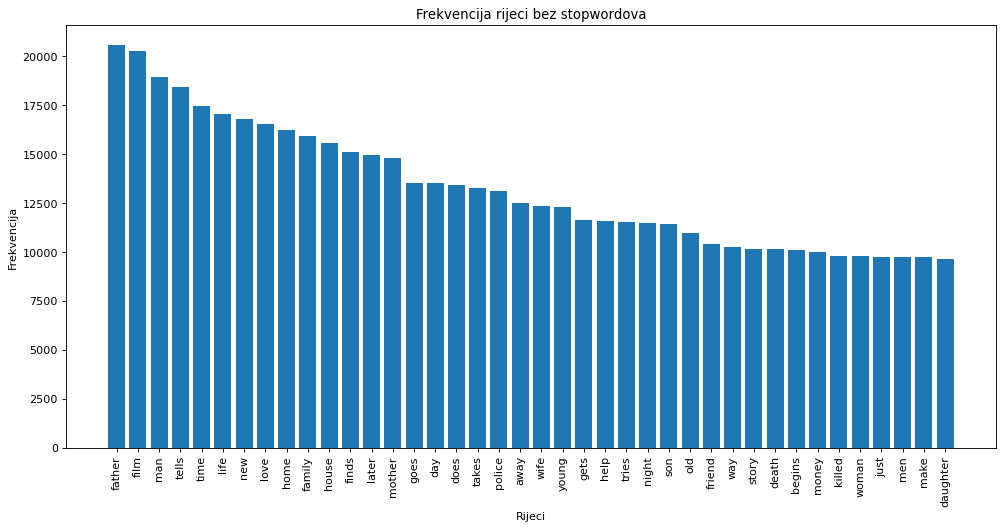

In [26]:
common_grams = get_top_n_words(data['summary_str'], 40)
    
plt.figure(figsize=(15, 7), dpi=80)
plt.bar([x[0] for x in common_grams], [x[1] for x in common_grams])

plt.xlabel("Rijeci")
plt.ylabel("Frekvencija")
plt.title('Frekvencija rijeci bez stopwordova')

ax = plt.gca()
ax.set_xticklabels([x[0] for x in common_grams], rotation = 90)

plt.show()

/home/ltomic/anaconda3/envs/strojno/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


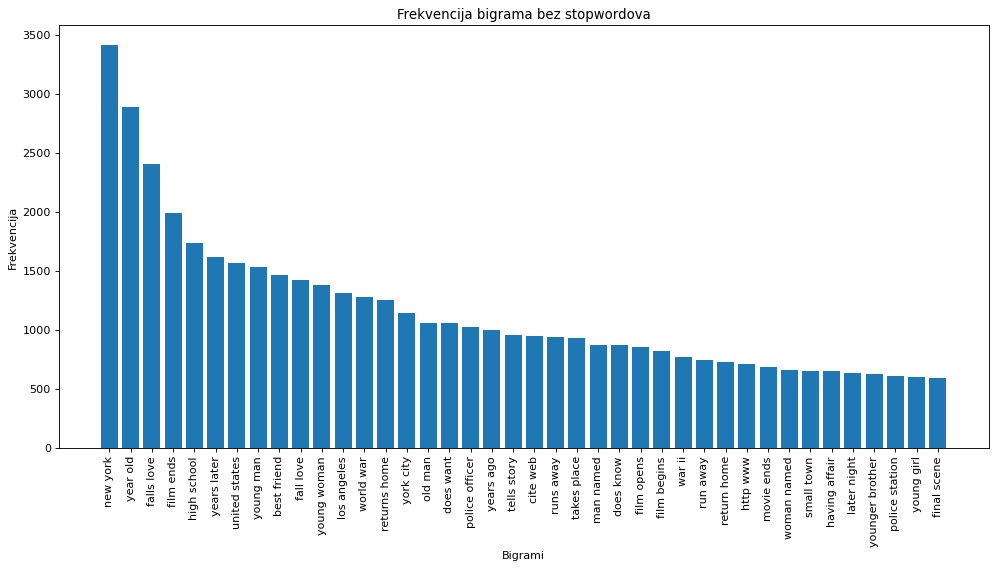

In [27]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_grams = get_top_n_bigram(data['summary_str'], 40)
    
plt.figure(figsize=(15, 7), dpi=80)
plt.bar([x[0] for x in common_grams], [x[1] for x in common_grams])

plt.xlabel("Bigrami")
plt.ylabel("Frekvencija")
plt.title('Frekvencija bigrama bez stopwordova')

ax = plt.gca()
ax.set_xticklabels([x[0] for x in common_grams], rotation = 90)

plt.show()

Vidimo neke potencijalne bigrame koji bi mogli (barem ovako intuitivno) indicirati o kojem zanru filma se radi :<br />
falls love ili fall love -> romantic (vidimo da trebamo napraviti lemminizaciju ili stemminizaciju) <br />
high school -> teen <br />
world war -> historic ili war <br />
police officer -> crime  <br />

Ali tako mozemo primjetiti i da nije potreban bigram u ovim slucajevima jer je dovoljna jedna rijec  <br />
falls love -> love -> romantic  <br />
high school -> school -> teen  <br />
world war -> war -> war  <br />
police officer -> police -> crime  <br />

Mozda je bolje pogledati s tfidf vectorizerom

/home/ltomic/anaconda3/envs/strojno/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


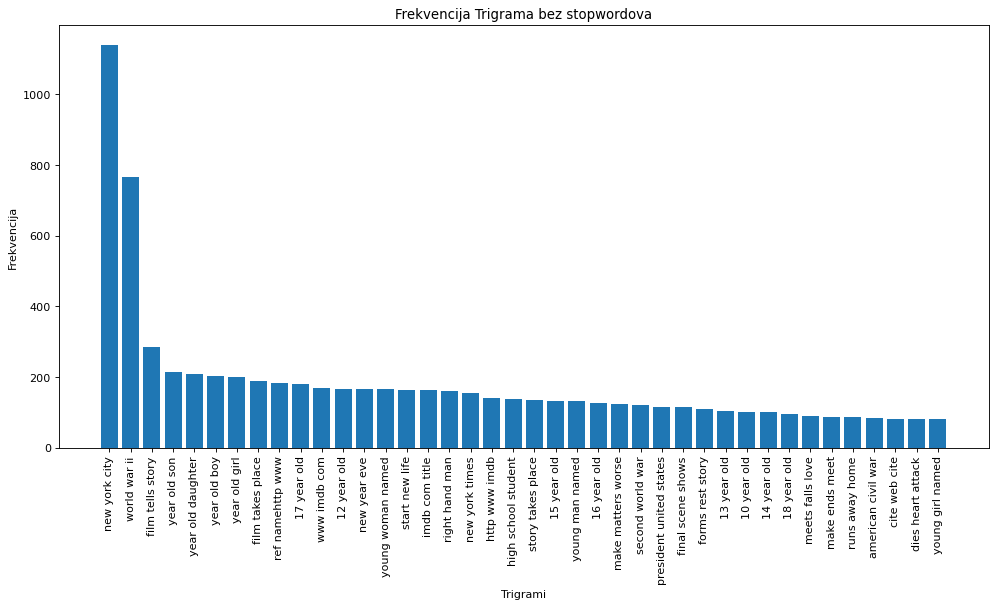

In [28]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_grams = get_top_n_trigram(data['summary_str'], 40)
    
plt.figure(figsize=(15, 7), dpi=80)
plt.bar([x[0] for x in common_grams], [x[1] for x in common_grams])

plt.xlabel("Trigrami")
plt.ylabel("Frekvencija")
plt.title('Frekvencija Trigrama bez stopwordova')

ax = plt.gca()
ax.set_xticklabels([x[0] for x in common_grams], rotation = 90)

plt.show()

www imdb com -> izgleda da cemo jos malo morat cistiti <br/>


In [30]:
data.drop(columns=['tokenized_len']).to_pickle('data.pkl')